# Dataset Analysis

Prior to executing training tasks, performing comprehensive dataset feature analysis is essential. This process enables systematic evaluation of training memory requirements through statistical characteristics (e.g., edge distribution in individual graph structures), informs parameter configuration strategies (including neural network irreducible representations), and guides performance expectation assessments while establishing model evaluation baselines.

## DFT Data Features

### Command Line Interface

The `dock analyze dataset features` command provides comprehensive analysis of DFT dataset characteristics, enabling users to make informed decisions about model architecture and training strategy.

```bash
dock analyze dataset features [OPTIONS] DATA_PATH
```

#### Basic Usage

```bash
# Analyze dataset with default settings
dock analyze dataset features /path/to/your/data

# Analyze dataset with specified orbital types
dock analyze dataset features . --common-orbital-types s3p2d1f1

# Analyze dataset considering parity and with parallel processing
dock analyze dataset features /path/to/data --consider-parity -p 4
```

#### Options Explained

| Option | Alias | Description | Default |
|--------|-------|-------------|---------|
| `--parallel-num` | `-p` | Number of parallel processes for analysis. `-1` uses all available CPU cores. | `-1` |
| `--tier-num` | `-t` | Directory tier level for DFT data organization: <br>• `-1`: `<data_path>/dft` <br>• `0`: `<data_path>/dft/<data_dirs>` <br>• `1`: `<data_path>/dft/<tier1>/<data_dirs>` | `0` |
| `--common-orbital-types` | `--common` | User-defined common orbital types specification (e.g., `s3p2d1f1`) | Auto-detected |
| `--consider-parity` | | Include parity consideration in irreps analysis | `False` |
| `--help` | `-h` | Display help message | N/A |

### Output Interpretation

The command generates a comprehensive analysis report with multiple sections:

#### Example Output for Water (H$_2$O) Dataset

```bash

📊 BASIC DATASET INFO
-----------------------
  • Spinful:                False
  • Parity consideration:   False
  • Total data points:      4,999

🧪 ELEMENT & ORBITAL INFO
---------------------------
  • Elements included:      H, O (2 elements)
  • Orbital source:         auto_detected
  • Common orbital types:   s3p2d1f1

🎯 IRREPS INFORMATION
-----------------------
  Irreps Type          Irreps                                             Dimension 
  .................... .................................................. ..........
  Common orbital       15x0e+24x1e+22x2e+18x3e+8x4e+3x5e+1x6e             441     
  Suggested            16x0e+24x1e+24x2e+24x3e+8x4e+4x5e+2x6e             518     
  Exp2                 32x0e+16x1e+8x2e+4x3e+2x4e+2x5e+2x6e               214     
  Trivial              32x0e+32x1e+32x2e+32x3e+32x4e+32x5e+32x6e          1568    

💡 RECOMMENDATIONS
--------------------
  1. Moderate dataset size - regular training recommended
  2. High-dimensional irreps - consider dimensionality reduction techniques
```

#### Key Information Sections

**1. Basic Dataset Info**
- **Spinful**: Indicates if the system is spin-polarized (True) or spin-restricted (False)
- **Parity consideration**: Whether spatial inversion symmetry is considered in irreps
- **Total data points**: Number of DFT calculation samples available for training

**2. Element & Orbital Info**
- **Elements included**: Chemical elements present in the dataset with count
- **Orbital source**: Whether orbital types were auto-detected or user-specified
- **Common orbital types**: Orbital basis specification in `sNpNdNfN` format
  - Example: `s3p2d1f1` means 3 s-orbitals, 2 p-orbitals, 1 d-orbital, 1 f-orbital

**3. Irreps Information**
The irreps (irreducible representations) table shows four different symmetry-adapted representations:

| Irreps Type | Purpose | When to Use |
|-------------|---------|-------------|
| **Common orbital** | Symmetry-adapted basis from detected orbital types | Default choice for most models |
| **Suggested** | Optimized representation based on symmetry analysis | For best performance with the current dataset |
| **Exp2** | Reduced-dimensional representation | When computational efficiency is prioritized |
| **Trivial** | Complete (non-symmetry-adapted) representation | As a baseline or for debugging |

The notation `NxMe` indicates `N` occurrences of irreducible representation with angular momentum `M` and parity `e` (even). For example, `15x0e` means 15 scalar (ℓ=0) even-parity representations.

**4. Dimension Analysis**
Each irreps type has a total dimension indicating the feature vector size. This directly impacts:
- Model parameter count
- Memory requirements
- Training time
- Model capacity

**5. Recommendations**
Context-specific suggestions based on dataset characteristics:
- **Dataset size guidance**: Small (<100 samples), Moderate (100-6000), Large (>6000)
- **Architecture suggestions**: Based on irreps dimensionality and system properties
- **Training strategies**: Recommendations for regularization, augmentation, etc.

### Practical Usage Scenarios

#### 1. Initial Dataset Assessment
```bash
# Quick initial assessment with defaults
dock analyze dataset features /your/data/inputs
```
Use this to get a baseline understanding of your dataset's scale and complexity.

#### 2. Orbital Basis Optimization
```bash
# Compare different orbital basis choices
dock analyze dataset features ./inputs --common-orbital-types s10p5d3
dock analyze dataset features ./inputs --common-orbital-types s12p7d5f3
```
Compare dimension reductions and select the optimal balance between accuracy and efficiency.

#### 3. Training Configuration Planning
Based on the output:
- **Total data points**: Determines train/validation/test split ratios
- **Irreps dimensions**: Guides model architecture design and hidden layer sizes
- **Memory estimate**: Informs GPU memory requirements and batch size selection

#### 4. Performance Benchmarking
```bash
# Analyze with parity consideration for comparison
dock analyze dataset features /path --consider-parity
```
Compare dimensions with and without parity to understand the impact of symmetry constraints.

### Interpreting Dimension Values

**Common orbital dimension**: 441
- Represents the symmetry-adapted feature space size
- Determines the input layer size of the neural network
- Higher values capture more complex chemical environments but require more parameters

**Suggested vs Common**:
- **The Suggested Irreps are usually the recommended choice.**
- Suggested dimension (518) > Common (441): The algorithm suggests expanding the representation
- This indicates potential benefits from a richer feature space

**Exp2 dimension**: 214
- Approximately half of common orbital dimension
- Useful for testing if reduced features still capture essential physics

**Trivial dimension**: 1568
- Non-symmetry-adapted, complete basis
- Much larger dimension highlights the compression achieved by symmetry adaptation

### Advanced Analysis Tips

1. **Tier Number Selection**: Use `-t` option to match your directory structure
   ```bash
   # For data organized as: 
   #  - data/dft/tire1/material1
   #  - data/dft/tire1/material2
   #  - data/dft/tire2/material3
   #  - ...
   dock analyze dataset features data -t 1
   ```

2. **Parallel Processing**: For large datasets, adjust parallel processing
   ```bash
   # Use 8 cores for faster analysis
   dock analyze dataset features /path -p 8
   ```

3. **Orbital Type Notation**: The orbital type string follows `sNpNdNfN` format where:
   - `s3`: 3 s-orbitals (typically 1s, 2s, 3s)
   - `p2`: 2 p-orbitals (typically 2p, 3p)
   - `d1`: 1 d-orbital (typically 3d)
   - `f1`: 1 f-orbital (typically 4f)

### Common Output Patterns

| Dataset Type | Expected Irreps Dimension | Typical Recommendations |
|--------------|---------------------------|-------------------------|
| **Small molecule** | 2000-5000 | Data augmentation, transfer learning |
| **Bulk material** | 200-600+ | High-capacity model, regularization |
| **Spin-polarized** | Approximately 2× larger | Ensure spin-symmetry handling |
| **Multi-element** | Higher dimension | Element-specific embeddings |

### Next Steps After Analysis

1. **Model Architecture Design**: Use the irreps dimensions to design your neural network layers
2. **Training Configuration**: Set batch size based on memory estimates
3. **Performance Expectations**: Use dataset size to estimate training convergence time
4. **Validation Strategy**: Split data appropriately based on total samples

This analysis provides the foundational understanding needed to configure effective machine learning models for materials science applications, ensuring appropriate model capacity for your specific dataset while maintaining computational efficiency.

## Edge number statistics

User can use the terminal tool to analyze the edge number of the structures in the dataset. The edge number is related to the memory usage and speed of the training/inference processes. 
```bash
dock analyze dataset edge ./inputs -p 4
```
The description of the arguments can be shown by
```bash
dock analyze dataset edge -h
```
```
Usage: dock analyze dataset edge [OPTIONS] DATA_PATH

  Statistic and show edge related information.

Options:
  -p, --parallel-num INTEGER  The parallel processing number, -1 for using all of the cores.  [default: -1]
  -t, --tier-num INTEGER      The tier number of the dft data directory, -1 for <data_path>/dft, 0 for <data_path>/dft/<data_dirs>, 1 for <data_path>/dft/<tier1>/<data_dirs>, etc. [default: 0]
  --edge-bins INTEGER         The bins count width, default is auto decided.
  --plot-dpi INTEGER          The bin count plot DPI.  [default: 300]
  -h, --help                  Show this message and exit.
```

For advanced users, deeph-dock provides the `DatasetAnalyzer` class.

In [ ]:
from deepx_dock.analyze.dataset.analyze_dataset import DatasetAnalyzer

data_path = "./inputs"
parallel_num = 4
tier_num = 0
edge_bins = None
plot_dpi = 300

inspector = DatasetAnalyzer(
    data_path=data_path,
    n_jobs=parallel_num,
    n_tier=tier_num,
)
features = inspector.gen_dft_features()
inspector.statistic_edge_quantity(
    features=features,
    bins=edge_bins,
)

```
[do] Locate all DFT data directories ...
[rawdata] Processing DFT data in inputs/dft.
  +-[search]: 13it [00:00, 10429.60it/s]
[rawdata] Found 13 structures in inputs/dft.
```

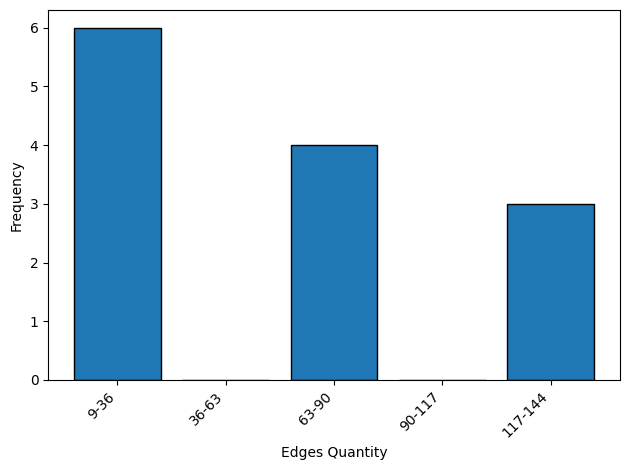

In [3]:
inspector.plot_edge_quantity(dpi=plot_dpi)

## Dataset split generation

User can use the terminal tool to split the dataset into train set, validation set, and test set. A json file containing the split structure names is dumped.
```bash
dock analyze dataset split ./inputs -p 4
cat ./dataset_split.json
```
```json
{"train": ["25001", "1001", "4992", "25000", "4990", "4991", "4995"], "validate": ["25003", "4994"], "test": ["1002", "4993", "25002", "1000"]}
```
The description of the arguments can be shown by
```bash
dock analyze dataset split -h
```
```
Usage: dock analyze dataset split [OPTIONS] DATA_PATH

  Generate train, validate, and test data split json file.

Options:
  -p, --parallel-num INTEGER      The parallel processing number, -1 for using all of the cores.  [default: -1]
  -t, --tier-num INTEGER          The tier number of the dft data directory, -1 for <data_path>/dft, 0 for <data_path>/dft/<data_dirs>, 1 for <data_path>/dft/<tier1>/<data_dirs>, etc. [default: 0]
  --split-ratio <FLOAT FLOAT FLOAT>...
                                  The train_ratio, validate_ratio and test_ratio of the split data.  [default: 0.6, 0.2, 0.2]
  --split-max-edge-num INTEGER    The max edge number of the split data, -1 for no constraint.  [default: -1]
  --split-rng-seed INTEGER        The random seed for processing dataset. [default: 137]
  -h, --help                      Show this message and exit.
```

The class API is also provided.

In [ ]:
from deepx_dock.analyze.dataset.analyze_dataset import DatasetAnalyzer

data_path = "./inputs"
parallel_num = 4
tier_num = 0
split_ratio = [0.6, 0.2, 0.2]
split_max_edge_num = -1
split_rng_seed = 137

inspector = DatasetAnalyzer(
    data_path=data_path,
    n_jobs=parallel_num,
    n_tier=tier_num,
)
features = inspector.gen_dft_features()
inspector.generate_data_split_json(
    features=features,
    train_ratio=split_ratio[0],
    val_ratio=split_ratio[1],
    test_ratio=split_ratio[2],
    max_edge_num=split_max_edge_num,
    rng_seed=split_rng_seed,
)

```
[do] Locate all DFT data directories ...
[rawdata] Processing DFT data in `inputs/dft`.
  +-[search]: 13it [00:00, 10233.85it/s]
[rawdata] Found `13` structures in `inputs/dft`.
Data Split: 100%|██████████| 13/13 [00:00<00:00, 27.47it/s]
[info] Total available data dirs: 13
[info] Data split json saved to ./dataset_split.json.
```